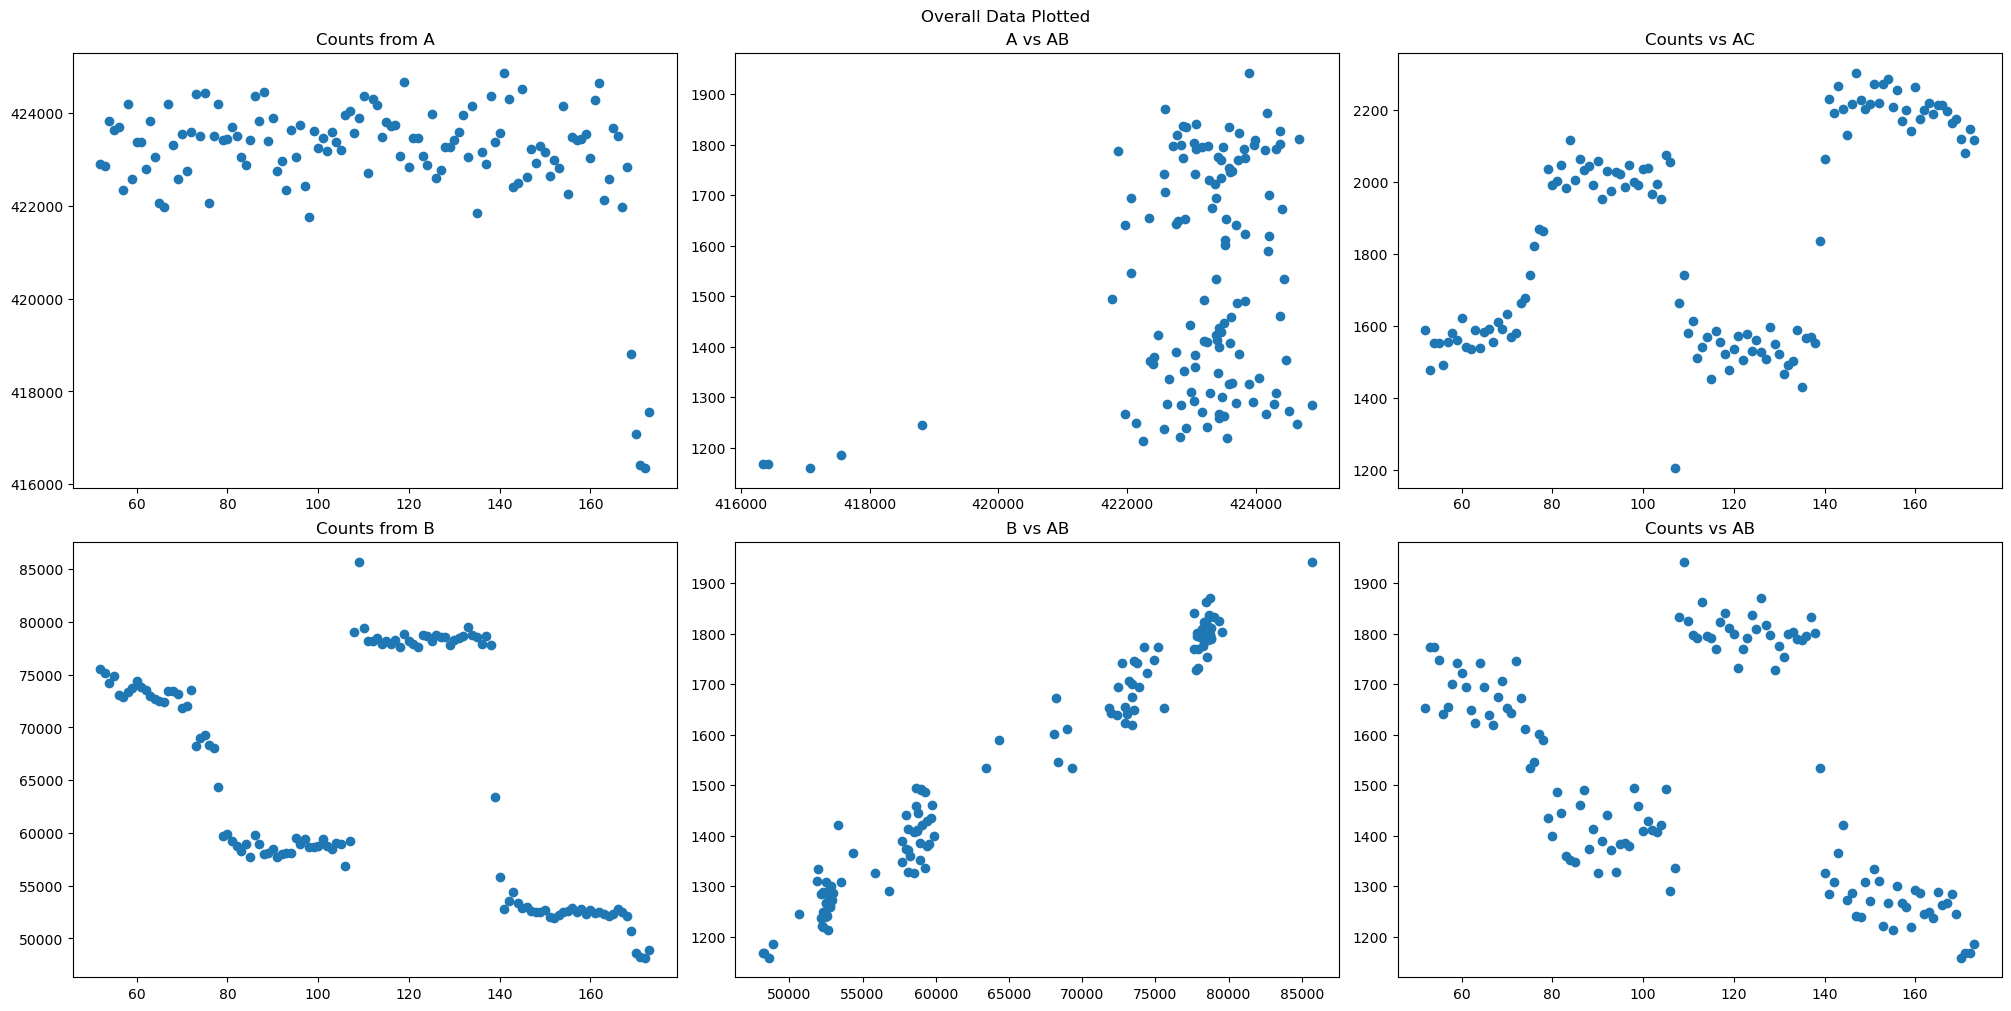

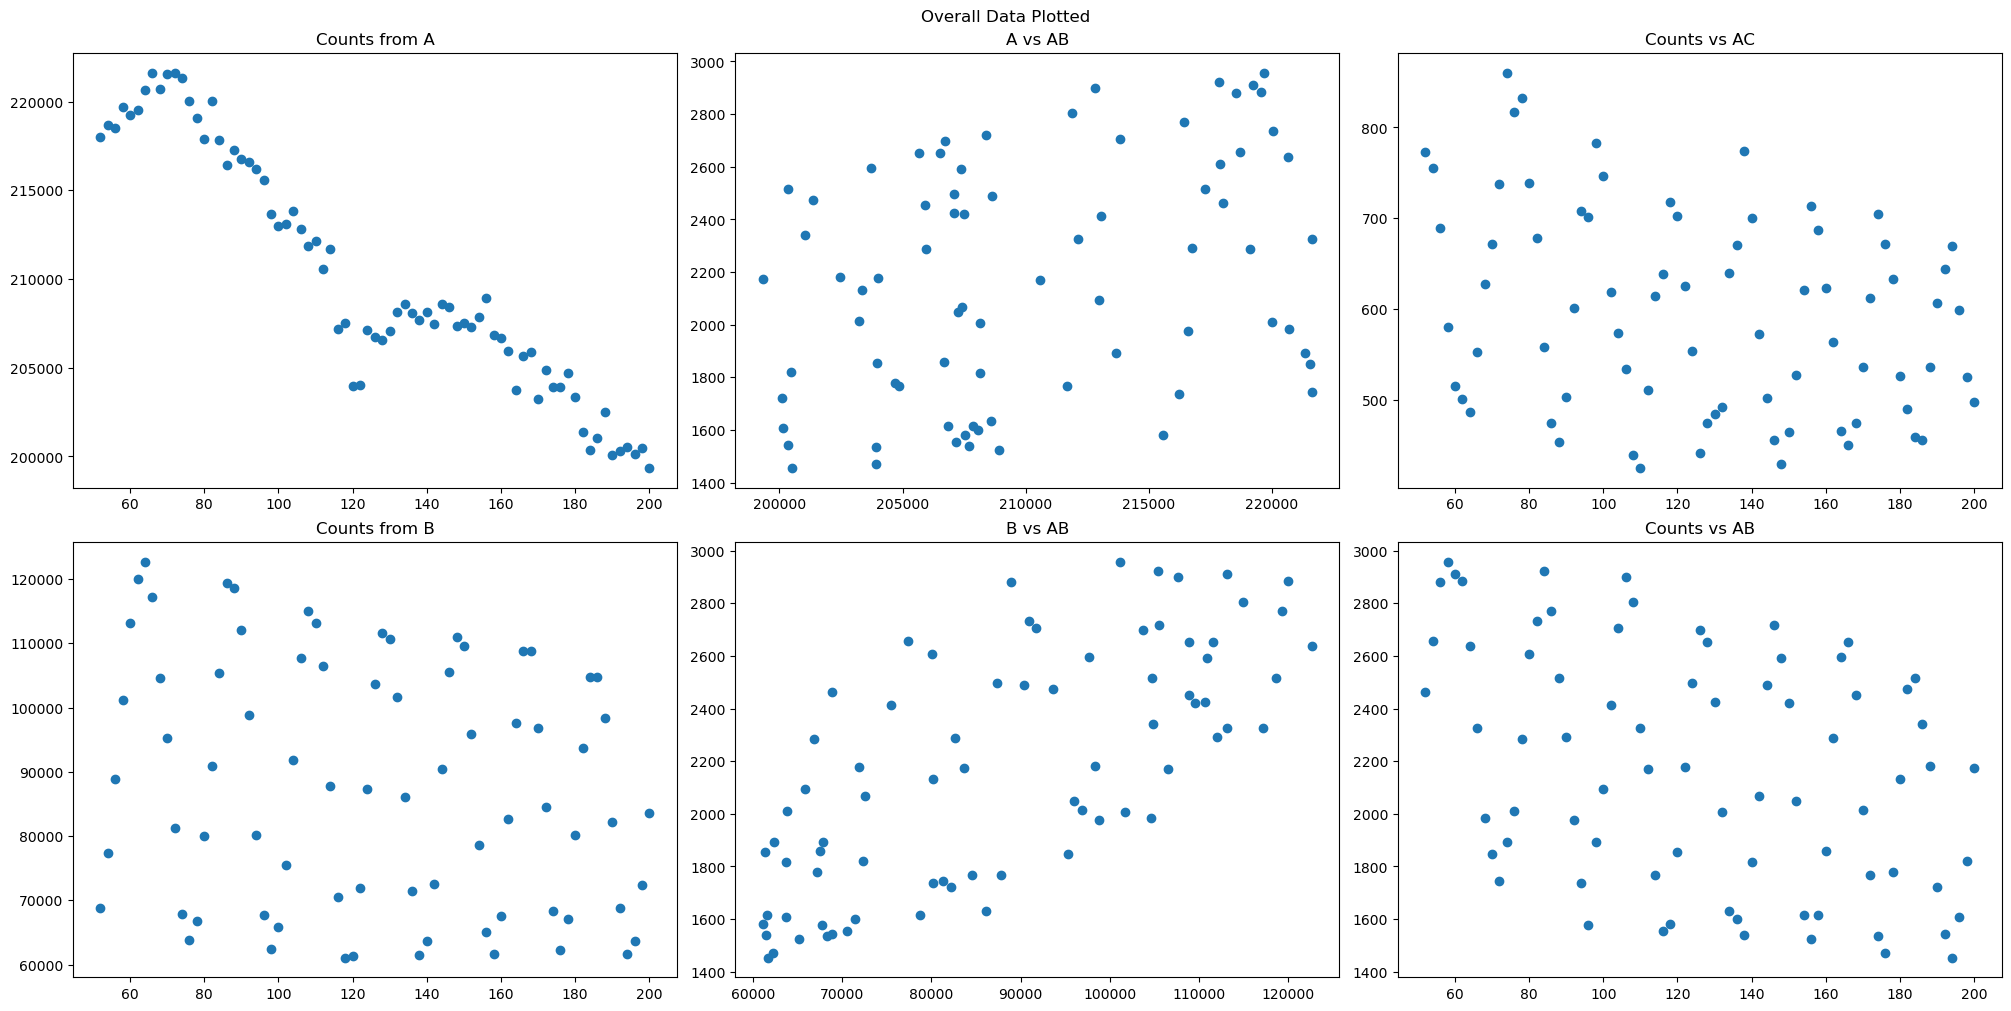

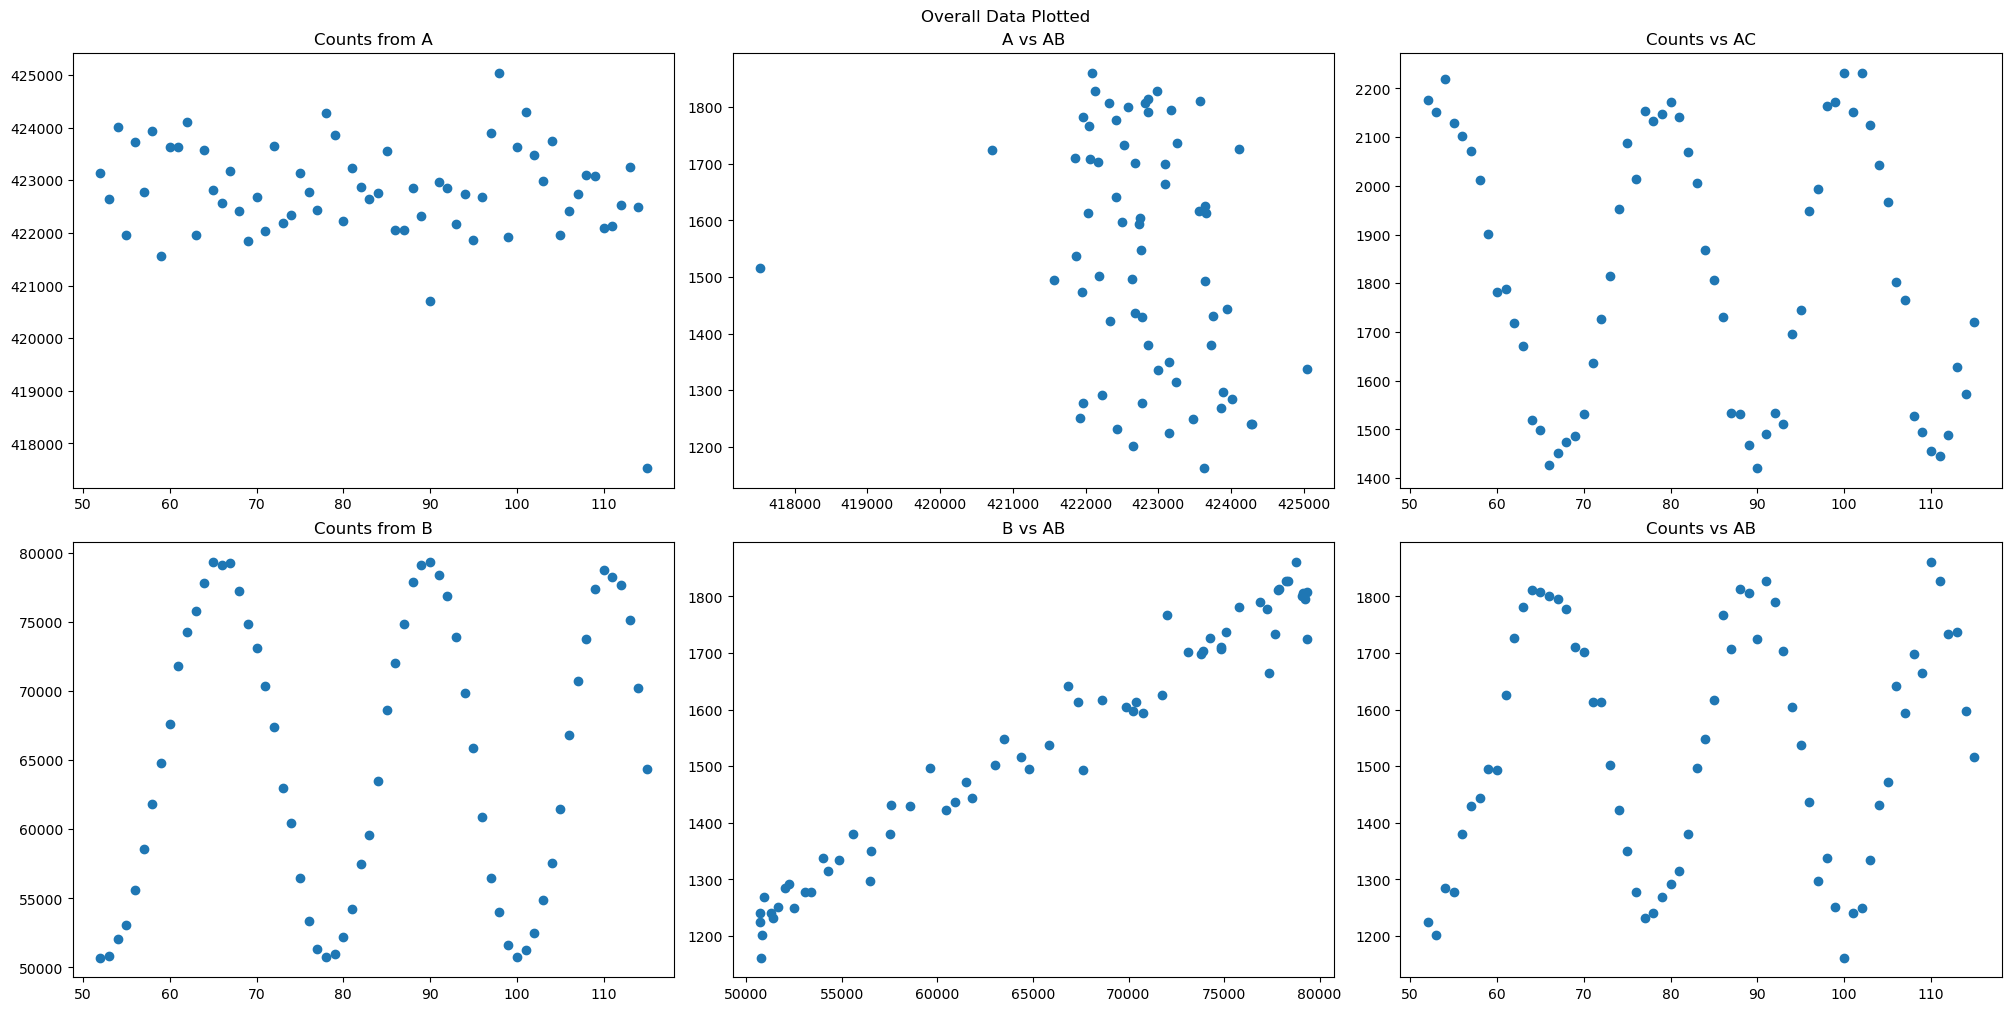

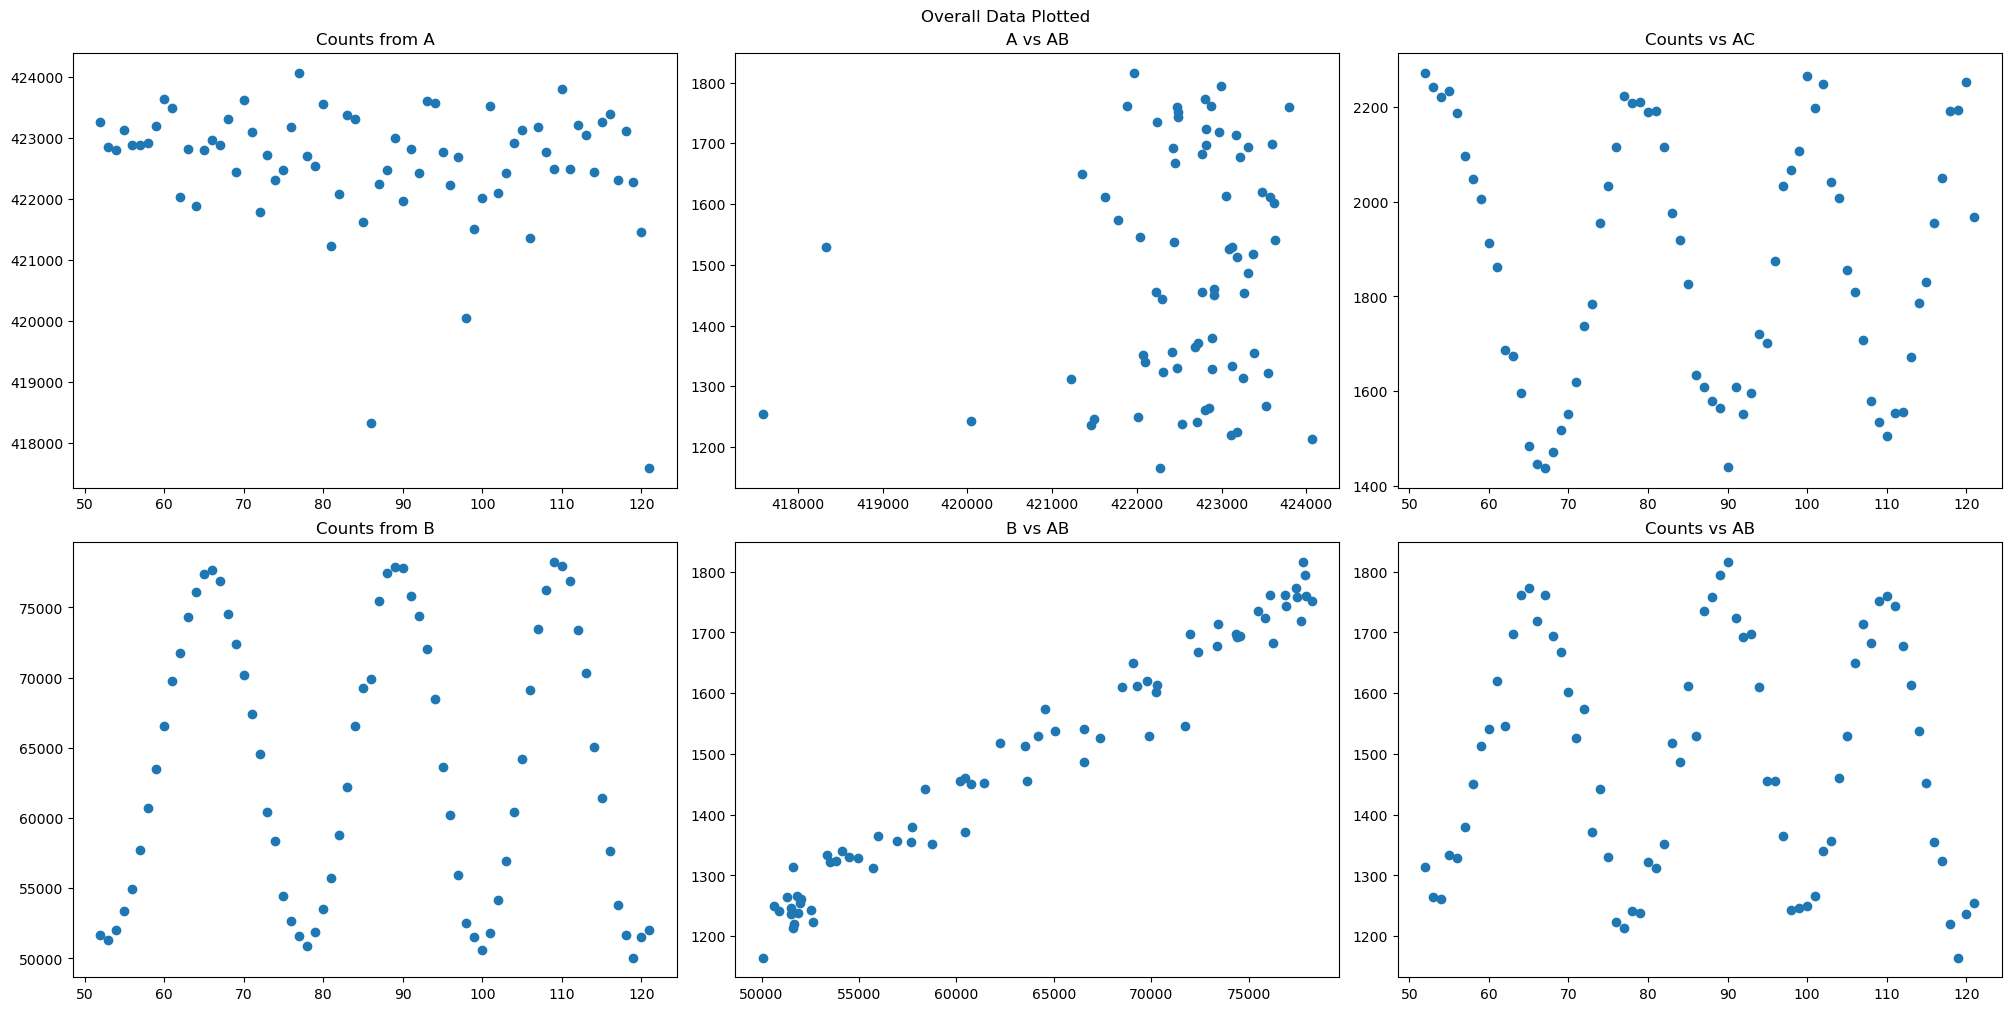

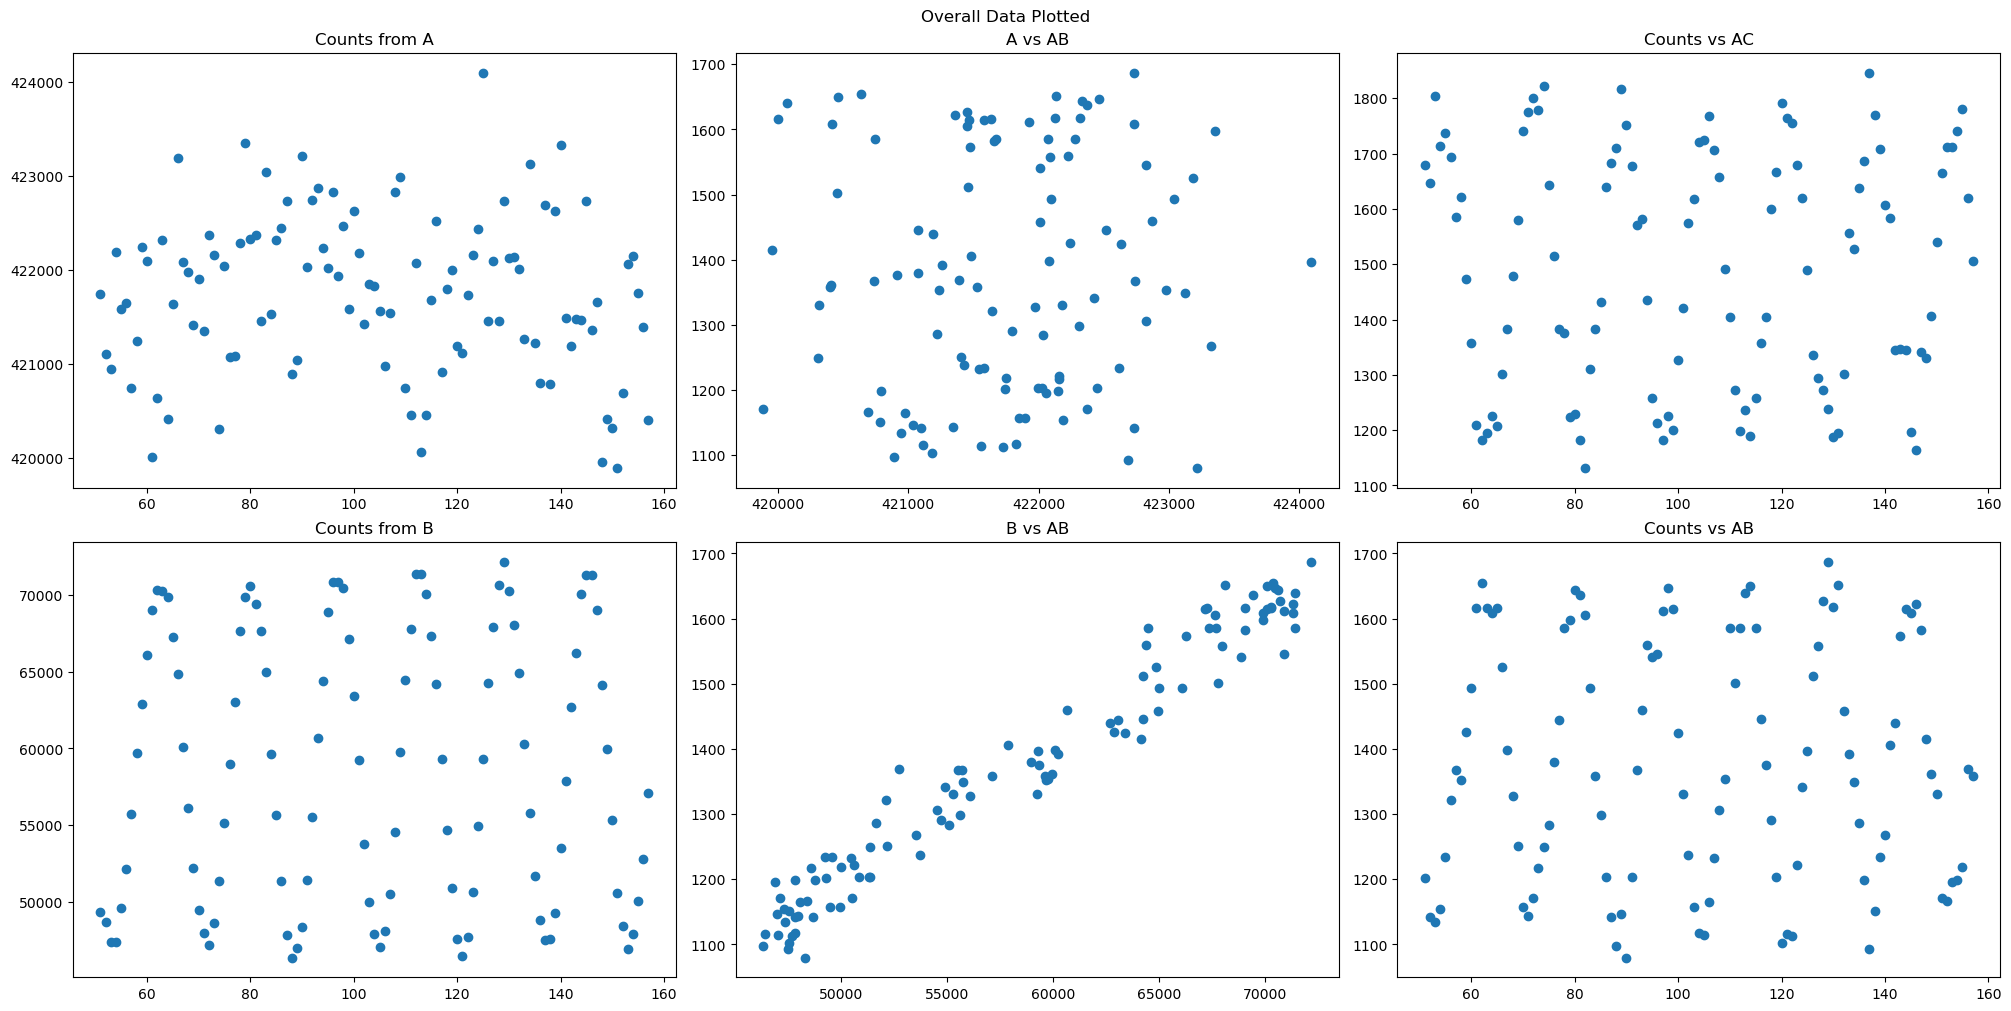

In [34]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os

def plot(data,plotname):
    fig, ax =plt.subplots(2,3,figsize = (20,10), layout="constrained")
    fig.suptitle("Overall Data Plotted")
    fig.add_gridspec

    ax[0,0].set_title("Counts from A")
    #ax[0,0].set_ylabel("Interfernce")
    #ax[0,0].set_xlabel("Count Number")
    ax[0,0].scatter(data.Counts,data.A)

    ax[0,1].set_title("A vs AB")
    #ax[0,1].set_ylabel("Interfernce")
    #ax[0,1].set_xlabel("Count Number")
    ax[0,1].scatter(data.A,data.AB)

    ax[0,2].set_title("Counts vs AC")
    #ax[0,2].set_ylabel("Interfernce")
    #ax[0,2].set_xlabel("Count Number")
    ax[0,2].scatter(data.Counts,data.AC)

    ax[1,0].set_title("Counts from B")
    #ax[1,0].set_ylabel("Interfernce")
    #ax[1,0].set_xlabel("Count Number")
    ax[1,0].scatter(data.Counts,data.B)

    ax[1,1].set_title("B vs AB")
    #ax[1,1].set_ylabel("Interfernce")
    #ax[1,1].set_xlabel("Count Number")
    ax[1,1].scatter(data.B,data.AB)

    ax[1,2].set_title("Counts vs AB")
    #ax[1,2].set_ylabel("Interfernce")
    #ax[1,2].set_xlabel("Count Number")
    ax[1,2].scatter(data.Counts,data.AB)
    
    path = 'plots/'
    try:
        path =os.path.join(path, plotname)
        fig.savefig(path)
    except OSError as error:
        if os.path.exists(path):
            os.remove(path)
            path =os.path.join(path, plotname)
    
    return fig

files = []
for f in glob.glob("Data/*.txt"):
    file = pd.read_csv(f,delimiter="\t")
    file = file.loc[~(file ==0).all(axis=1)]
    file = file.iloc[:,0:6]
    file.columns =['Counts','A','B','AB','C','AC']
    name = f.split('.txt')[0].split('\\')[1]
    plot(file,name)